In [2]:
import glob
import os
import re
import mne
import sys
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne_bids import BIDSPath, read_raw_bids

In [18]:
# Read stft_power files and append all to data frame
first_sub = True
power = np.empty([])
events = np.empty([])

for fpath in glob.glob("../data/bids/derivatives/decoding/*/*stft_power*"):
    print(fpath)

    # Average over all channels
    sub_power = np.load(fpath)
    sub_power = np.mean(sub_power, axis = 1) 
       
    # Get event codes
    m = re.search('sub-(\d{1,2})_', fpath)
    sub = m.group(1)
    m = re.search('run-(\d)', fpath)
    run = m.group(1)
    sub_events = np.load(f"../data/bids/derivatives/preprocessing/sub-{sub}/sub-{sub}_run-{run}_events.npy")
    
    if first_sub == True:
        power = sub_power # n_epochs, n_freqs, n_windows
        events = sub_events
        first_sub = False
    if len(sub_events) != np.shape(sub_power)[0]:
        print(f"Number of trials don't match, events file has {len(sub_events)} events, stft_power file has {np.shape(sub_power)[0]} trials")
        continue
    else:
        try: 
            power = np.append(power, sub_power, axis = 0)
            events = np.append(events, sub_events, axis = 0)
        except:
            print("ValueError: stft coefficients have the wrong shape, skipping subject")
            continue

../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-23/sub-23_task-pitch_run-1_desc-stft_power.npy
Number of trials don't match, events file has 3700 events, stft_power file has 3702 trials
../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-40/sub-40_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-8/sub-8_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-33/sub-33_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-1_desc-stft_power.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-

In [23]:
np.shape(power)

(164936, 5, 19)

In [42]:
indexes = np.where(events == 250)
power_250 = power[indexes,4,:]
power_250 = np.squeeze(power_250)
power_250 = np.mean(power_250, axis = 0)

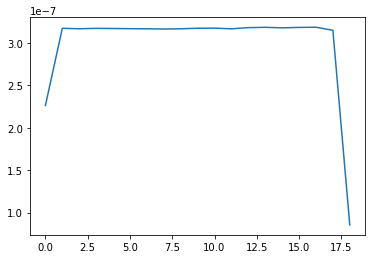

In [44]:
np.shape(power_250)
x = list(range(len(power_250)))
plt.plot(x, power_250)

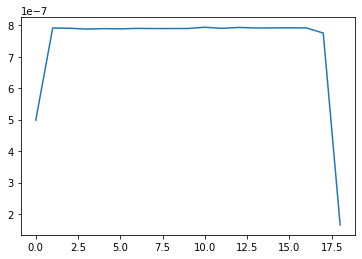

In [45]:
indexes = np.where(events == 50)
power_50 = power[indexes,0,:]
power_50 = np.squeeze(power_50)
power_50 = np.mean(power_50, axis = 0)
np.shape(power_50)
x = list(range(len(power_50)))
plt.plot(x, power_50)

In [15]:
def get_sub_and_run(fpath):
    sub = re.findall(r'sub-(\d{1,2})', fpath)[0]
    run = re.findall(r'run-(\d{1})', fpath)[0]
    return(sub, run)

# def recode_events(events):
#     mapping = {10001: 100, 10002: 150, 10003: 200, 10004: 250, 10005: 50}
#     recoded_events = np.vectorize(mapping.get)(events)
#     return(recoded_events)

# # Get coordinates of all channels 
# epoch_paths = glob.glob('../data/bids/derivatives/preprocessing/*/*res-hi*fif.gz')
# pattern = re.compile('sub-(\d{1,2})_')
# epoch_sub_order = list(map(pattern.findall, epoch_paths))
# epoch_sub_order = list(itertools.chain(*epoch_sub_order))
# pattern = re.compile('run-(\d{1,2})_')
# epoch_run_order = list(map(pattern.findall, epoch_paths))
# epoch_run_order = list(itertools.chain(*epoch_run_order))

npy_paths = glob.glob('../data/bids/derivatives/decoding/*/*stft_power*')
power = np.empty([])
events = np.empty([])
first_sub = True

# for each captrak file
for npy_path in npy_paths:
    
    # get power
    print(f"Reading power values from: {npy_path}")
    sub_power = np.load(npy_path)
    
    # average over all channels
    sub_power = np.mean(sub_power, axis = 1)
    
    # get subject and run
    sub, run = get_sub_and_run(npy_path)
    
    # find the right events file
    root = '../data/bids/derivatives/preprocessing/'
    events_path = f'{root}/sub-{sub}/sub-{sub}_run-{run}_events.npy'
    print(f"Reading events from: {events_path}")
    sub_events = np.load(events_path)

    # compare trial length
    epoch_trials = np.shape(sub_power)[0]
    event_trials = len(sub_events)
    print(event_trials) # so many have 3841 events lol why
    if epoch_trials != event_trials:
        print(sub_events)
        print(f"ValueError: mismatching number of trials, {epoch_trials} and {event_trials}")
    
#     # add to arrays
#     if first_sub == True:
#         power = sub_power
#         events = sub_events
#         first_sub = False
#     else:
#         try: 
#             power = np.append(power, sub_power, axis = 0)
#             events = np.append(events, sub_events)
#         except:
#             print("ValueError: stft coefficients have the wrong shape, skipping subject")
#             continue

Reading power values from: ../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-7/sub-7_run-1_events.npy
3841
Reading power values from: ../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-28/sub-28_run-1_events.npy
2384
[200  50 250 ... 100 150 100]
ValueError: mismatching number of trials, 4768 and 2384
Reading power values from: ../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-34/sub-34_run-1_events.npy
1921
Reading power values from: ../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-39/sub-39_run-1_events.npy
2221
[250 250 200 ... 100  50 100]
ValueError: mismatching number of trials, 4441 and 2

Reading events from: ../data/bids/derivatives/preprocessing//sub-6/sub-6_run-1_events.npy
2388
[100  50 100 ...  50 150 250]
ValueError: mismatching number of trials, 4775 and 2388
Reading power values from: ../data/bids/derivatives/decoding/sub-18/sub-18_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-18/sub-18_run-1_events.npy
2379
[150 200 200 ... 150  50 100]
ValueError: mismatching number of trials, 4757 and 2379
Reading power values from: ../data/bids/derivatives/decoding/sub-4/sub-4_task-pitch_run-2_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-4/sub-4_run-2_events.npy
1921
Reading power values from: ../data/bids/derivatives/decoding/sub-4/sub-4_task-pitch_run-1_desc-stft_power.npy
Reading events from: ../data/bids/derivatives/preprocessing//sub-4/sub-4_run-1_events.npy
2416
Reading power values from: ../data/bids/derivatives/decoding/sub-29/sub-29_task-pitch_run-1_desc-stft_power.npy
Re

In [13]:
# Read stft_power files and append all to data frame
first_sub = True
power = np.empty([])

for fpath in glob.glob("../data/bids/derivatives/decoding/*/*stft_power*"):
    print(fpath)
    sub_power = np.load(fpath)

    # Average over all channels
    sub_power = np.mean(sub_power, axis = 1)
    
    if first_sub == True:
        power = sub_power
        first_sub = False
    else:
        try: 
            power = np.append(power, sub_power, axis = 0)
        except:
            print("ValueError: stft coefficients have the wrong shape, skipping subject")
            continue
            
            
#     try: 
    print(np.shape(sub_power)) # n_epochs, n_freqs, n_windows
    print(np.shape(power))
#     power = np.stack([power, sub_power]) # CHANGE STACKING
#     except:
#         print("ValueError: subject is probably missing a channel, skipping file")
#         continue

../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-stft_power.npy
(3841, 5, 19)
(3841, 5, 19)
../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-stft_power.npy
(4768, 5, 19)
(8609, 5, 19)
../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-stft_power.npy
(1921, 5, 19)
(10530, 5, 19)
../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-stft_power.npy
(4441, 5, 19)
(14971, 5, 19)
../data/bids/derivatives/decoding/sub-40/sub-40_task-pitch_run-1_desc-stft_power.npy
(3841, 5, 19)
(18812, 5, 19)
../data/bids/derivatives/decoding/sub-27/sub-27_task-pitch_run-1_desc-stft_power.npy
(4723, 5, 19)
(23535, 5, 19)
../data/bids/derivatives/decoding/sub-8/sub-8_task-pitch_run-1_desc-stft_power.npy
(3841, 5, 19)
(27376, 5, 19)
../data/bids/derivatives/decoding/sub-33/sub-33_task-pitch_run-1_desc-stft_power.npy
(4782, 5, 19)
(32158, 5, 19)
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-1_desc-stft_power.npy
(2881, 5,

In [14]:
# want it to be n_epochs, n_freqs*n_chans, n_windows

(152446, 5, 19)

In [10]:
np.shape(sub_power)

(4553, 19)

In [11]:
os.getcwd()

'/project2/hcn1/pitch_tracking/scripts'